In [1]:
import pandas as pd

In [2]:
events_df = pd.read_parquet("./data/eventos_sem_generic.parquet")

In [3]:
events_df.columns

Index(['event_id', 'event_type', 'period_id', 'timestamp', 'end_timestamp',
       'ball_state', 'ball_owning_team', 'team_id', 'player_id',
       'coordinates_x', 'coordinates_y', 'end_coordinates_x',
       'end_coordinates_y', 'receiver_player_id', 'body_part_type',
       'set_piece_type', 'pass_type', 'result', 'success', 'duel_type',
       'goalkeeper_type', 'card_type', 'match_id'],
      dtype='object')

In [11]:
players_df = pd.read_parquet("./data/13335.parquet")

In [12]:
players_df.columns

Index(['gameRefId', 'period', 'periodGameClockTime', 'frameNum',
       'game_event_id', 'possession_event_id', 'element', 'jerseyNum', 'x',
       'y'],
      dtype='object')

In [13]:
players_df.head()

,gameRefId,period,periodGameClockTime,frameNum,game_event_id,possession_event_id,element,jerseyNum,x,y
0,13335.0,1.0,0.000221,4612.0,12931923.0,12926009.0,home,30,0.713,-18.790
1,13335.0,1.0,0.000221,4612.0,12931923.0,12926009.0,home,28,0.982,-25.356
2,13335.0,1.0,0.000221,4612.0,12931923.0,12926009.0,home,17,0.087,-0.606
3,13335.0,1.0,0.000221,4612.0,12931923.0,12926009.0,home,25,-0.439,14.148
4,13335.0,1.0,0.000221,4612.0,12931923.0,12926009.0,home,2,-18.955,-9.156


In [39]:
events_df["coordinates_x"].min()

np.float64(-0.04305714285714287)

In [55]:
events_df[events_df["pass_type"] == "CROSS"].iloc[0]

event_id                     12926871
event_type                       PASS
period_id                           1
timestamp             00:05:35.369000
end_timestamp                    None
ball_state                      alive
ball_owning_team                   11
team_id                            11
player_id                          22
coordinates_x                0.088524
coordinates_y                0.099471
end_coordinates_x            0.060571
end_coordinates_y            0.672176
receiver_player_id                 18
body_part_type             RIGHT_FOOT
set_piece_type                   None
pass_type                       CROSS
result                           None
success                          None
duel_type                        None
goalkeeper_type                  None
card_type                        None
match_id                        13335
Name: 82, dtype: object

In [14]:
crosses_df = pd.merge(players_df, events_df[events_df["pass_type"] == "CROSS"], left_on="possession_event_id", right_on="event_id")
crosses_df

,gameRefId,period,periodGameClockTime,frameNum,game_event_id,possession_event_id,element,jerseyNum,x,y,...,receiver_player_id,body_part_type,set_piece_type,pass_type,result,success,duel_type,goalkeeper_type,card_type,match_id
0,NaN,1.0,181.481702,10051.0,12932919.0,12926871.0,home,30,-35.188,15.097,...,18,RIGHT_FOOT,None,CROSS,None,None,None,None,None,13335
1,NaN,1.0,181.481702,10051.0,12932919.0,12926871.0,home,28,-44.548,5.189,...,18,RIGHT_FOOT,None,CROSS,None,None,None,None,None,13335
2,NaN,1.0,181.481702,10051.0,12932919.0,12926871.0,home,17,-44.140,-5.814,...,18,RIGHT_FOOT,None,CROSS,None,None,None,None,None,13335
3,NaN,1.0,181.481702,10051.0,12932919.0,12926871.0,home,25,-39.152,5.099,...,18,RIGHT_FOOT,None,CROSS,None,None,None,None,None,13335
4,NaN,1.0,181.481702,10051.0,12932919.0,12926871.0,home,2,-43.713,-1.149,...,18,RIGHT_FOOT,None,CROSS,None,None,None,None,None,13335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,NaN,2.0,4816.149559,159617.0,12951983.0,12945644.0,ball,None,NaN,NaN,...,None,RIGHT_FOOT,None,CROSS,None,None,None,None,None,13335
522,NaN,2.0,4868.768845,161194.0,12952131.0,12945794.0,ball,None,NaN,NaN,...,4880,RIGHT_FOOT,CORNER_KICK,CROSS,None,None,None,None,None,13335
523,NaN,2.0,4972.706116,164309.0,12952652.0,12946314.0,ball,None,NaN,NaN,...,None,LEFT_FOOT,None,CROSS,None,None,None,None,None,13335
524,NaN,2.0,5392.259002,176883.0,12953615.0,12947230.0,ball,None,NaN,NaN,...,None,RIGHT_FOOT,CORNER_KICK,CROSS,None,None,None,None,None,13335


In [15]:
crosses_df.groupby("frameNum").first()

,gameRefId,period,periodGameClockTime,game_event_id,possession_event_id,element,jerseyNum,x,y,event_id,...,receiver_player_id,body_part_type,set_piece_type,pass_type,result,success,duel_type,goalkeeper_type,card_type,match_id
frameNum,,,,,,,,,,,,,,,,,,,,,
10051.0,NaN,1.0,181.481702,12932919.0,12926871.0,home,30,-35.188,15.097,12926871,...,18,RIGHT_FOOT,None,CROSS,None,None,None,None,None,13335
19421.0,NaN,1.0,494.127681,12933385.0,12927328.0,home,30,24.852,22.780,12927328,...,14278,RIGHT_FOOT,FREE_KICK,CROSS,None,None,None,None,None,13335
23910.0,NaN,1.0,643.910798,12933927.0,12927878.0,home,30,-32.950,-17.139,12927878,...,None,RIGHT_FOOT,None,CROSS,None,None,None,None,None,13335
24099.0,NaN,1.0,650.217104,12933995.0,12927949.0,home,30,-37.213,-17.543,12927949,...,4687,LEFT_FOOT,None,CROSS,None,None,None,None,None,13335
63406.0,NaN,1.0,1961.761982,12938408.0,12932318.0,home,30,-27.622,-3.586,12932318,...,None,RIGHT_FOOT,None,CROSS,None,None,None,None,None,13335
64696.0,NaN,1.0,2004.805025,12938650.0,12932553.0,home,30,-25.216,-13.521,12932553,...,None,LEFT_FOOT,None,CROSS,None,None,None,None,None,13335
71802.0,NaN,1.0,2241.908796,12940107.0,12933975.0,home,30,46.004,-21.226,12933975,...,19642,RIGHT_FOOT,CORNER_KICK,CROSS,None,None,None,None,None,13335
74027.0,NaN,1.0,2316.149703,12940243.0,12934107.0,home,30,-37.157,17.847,12934107,...,None,RIGHT_FOOT,FREE_KICK,CROSS,None,None,None,None,None,13335
109370.0,NaN,2.0,3139.572983,12945510.0,12939302.0,home,30,43.257,21.022,12939302,...,None,LEFT_FOOT,CORNER_KICK,CROSS,None,None,None,None,None,13335


In [54]:
crosses_df[crosses_df["frameNum"] == 19421.0]

,gameRefId,period,periodGameClockTime,frameNum,game_event_id,possession_event_id,element,jerseyNum,x,y,...,receiver_player_id,body_part_type,set_piece_type,pass_type,result,success,duel_type,goalkeeper_type,card_type,match_id
11,NaN,1.0,494.127681,19421.0,12933385.0,12927328.0,home,30,24.852,22.780,...,14278,RIGHT_FOOT,FREE_KICK,CROSS,None,None,None,None,None,13335
12,NaN,1.0,494.127681,19421.0,12933385.0,12927328.0,home,28,36.731,-9.888,...,14278,RIGHT_FOOT,FREE_KICK,CROSS,None,None,None,None,None,13335
13,NaN,1.0,494.127681,19421.0,12933385.0,12927328.0,home,17,39.488,-1.210,...,14278,RIGHT_FOOT,FREE_KICK,CROSS,None,None,None,None,None,13335
14,NaN,1.0,494.127681,19421.0,12933385.0,12927328.0,home,25,37.196,1.963,...,14278,RIGHT_FOOT,FREE_KICK,CROSS,None,None,None,None,None,13335
15,NaN,1.0,494.127681,19421.0,12933385.0,12927328.0,home,2,38.273,-6.995,...,14278,RIGHT_FOOT,FREE_KICK,CROSS,None,None,None,None,None,13335
16,NaN,1.0,494.127681,19421.0,12933385.0,12927328.0,home,24,25.781,24.610,...,14278,RIGHT_FOOT,FREE_KICK,CROSS,None,None,None,None,None,13335
17,NaN,1.0,494.127681,19421.0,12933385.0,12927328.0,home,5,40.427,1.208,...,14278,RIGHT_FOOT,FREE_KICK,CROSS,None,None,None,None,None,13335
18,NaN,1.0,494.127681,19421.0,12933385.0,12927328.0,home,16,35.729,-2.363,...,14278,RIGHT_FOOT,FREE_KICK,CROSS,None,None,None,None,None,13335
19,NaN,1.0,494.127681,19421.0,12933385.0,12927328.0,home,14,25.340,-5.740,...,14278,RIGHT_FOOT,FREE_KICK,CROSS,None,None,None,None,None,13335
20,NaN,1.0,494.127681,19421.0,12933385.0,12927328.0,home,1,-25.611,0.464,...,14278,RIGHT_FOOT,FREE_KICK,CROSS,None,None,None,None,None,13335


In [48]:
cross_df = players_df[players_df["frameNum"] == 19421.0		]
cross_df

,gameRefId,period,periodGameClockTime,frameNum,game_event_id,possession_event_id,element,jerseyNum,x,y
163922,NaN,1.0,494.127681,19421.0,12933385.0,12927328.0,home,30,24.852,22.780
163923,NaN,1.0,494.127681,19421.0,12933385.0,12927328.0,home,28,36.731,-9.888
163924,NaN,1.0,494.127681,19421.0,12933385.0,12927328.0,home,17,39.488,-1.210
163925,NaN,1.0,494.127681,19421.0,12933385.0,12927328.0,home,25,37.196,1.963
163926,NaN,1.0,494.127681,19421.0,12933385.0,12927328.0,home,2,38.273,-6.995
163927,NaN,1.0,494.127681,19421.0,12933385.0,12927328.0,home,24,25.781,24.610
163928,NaN,1.0,494.127681,19421.0,12933385.0,12927328.0,home,5,40.427,1.208
163929,NaN,1.0,494.127681,19421.0,12933385.0,12927328.0,home,16,35.729,-2.363
163930,NaN,1.0,494.127681,19421.0,12933385.0,12927328.0,home,14,25.340,-5.740
163931,NaN,1.0,494.127681,19421.0,12933385.0,12927328.0,home,1,-25.611,0.464


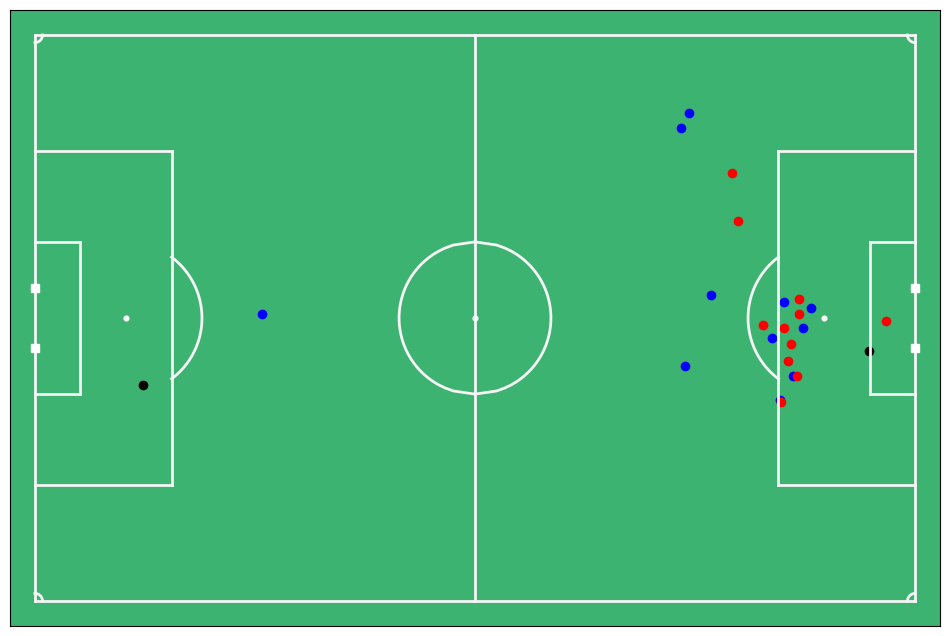

In [49]:
import plot

fig, ax = plot.plot_pitch()

home_team = cross_df[cross_df["element"] == "home"]
away_team = cross_df[cross_df["element"] == "away"]
ball = cross_df[cross_df["element"] == "ball"]

ax.scatter(home_team["x"], home_team["y"], color="blue")
ax.scatter(away_team["x"], away_team["y"], color="red")

ax.scatter([-40], [-8], color="black")

ax.scatter(ball["x"], ball["y"], color="black")
